# Predicting College Graduation Rates In US Universities

<img src="https://lh3.googleusercontent.com/proxy/K_cD0FQBiLnv8iYLsRa-WzaEliu1PYE5pEgx4hPYhTYhfYoBUl7gGPiPXTk-BNIw0M-CylfceKdLoO7uOTAXFqlTP92tuu0">

## Introduction: Introducing our Dataset

As university students, we all have graduation in our sights, but that is not always realized in some cases. We would like to explore what contributes to the varying graduation rates across colleges. These findings can help "institutions improve their degree completion rates" (DeAngelo et al., 2011). However, "institutional characteristics span a broad range of factors, ranging from financial and other resources"(Bailey et al., 2006), so we will be looking at a variety of variables to complete our analysis. 

The goal of our project is to predict the college graduation rate based on the most optimal explanatory variables. Through performing regressions using the techniques taught in this course, we can understand the importance of each feature from the magnitude of the coefficients and the p-values. In doing so, we hope to obtain an understanding into the composition of graduation rates.

The dataset we will be using is the “College” dataset from the ISLR package in R. It contains statistics for many different colleges in the US based on the 1995 issue of US News and World Report. There are 18 variables and 777 total observations, each row pertaining to a different college. Our explanatory variable is `Grad.Rate`, which represents the graduation rate of the corresponding college. We will consider the 17 other variables in the dataset as our explanatory variables for predicting graduation rate. Of our explanatory variables, there are 16 quantitative variables, such as `Outstate`, which corresponds to the out-of-state tuition, and there is 1 categorical variable called `Private`, which pertains to whether the college is private or not. This dataset originally came from the StatLib library at Carnegie Mellon University.


In [3]:
library(ISLR)
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
library(broom)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(GGally)
library(AER)
library(caret)

install.packages("corrplot")
library(corrplot)

NameError: name 'library' is not defined

## EDA Checklist

#### 1. Formulate The Question

The goal of our project is to predict the college graduation rate based on the most optimal explanatory variables.

#### 2. Read In Our Data

In [2]:
US_college_data <- College %>% filter(Grad.Rate <= 100)

# Remove Outlier Grad.Rate (discovered below) called Cazenovia College (118% grad rate)

# Change Private to Binary Input
US_college_data$Private <- as.factor(US_college_data$Private)

#Change names of top10perc and top25perc
names(US_college_data)[names(US_college_data) == 'Top25perc'] <- 'TopTwentyFivePerc'
names(US_college_data)[names(US_college_data) == 'Top10perc'] <- 'TopTenPerc'

head(US_college_data)

,Private,Apps,Accept,Enroll,TopTenPerc,TopTwentyFivePerc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


A Description of the variables can be found here: https://www.rdocumentation.org/packages/ISLR/versions/1.2/topics/College


## Variable Descriptions
Private: A categorical variable indicating "Yes" if the school is private, no if it's not private. <br/>
Apps: Number of applications received by the respective school in 1995. <br/>
Accept: Number of accepted applicants. <br/>
TopTenPerc: Percentage of new students in the top 10% of their high school class.<br/>
TopTwentyFivePerc: Percentage of new students in the top 25% of their high school class.<br/>
F.Undergrad: Number of full-time undergraduates.<br/>
P.Undergrad: Number of part-time undergraduates.<br/>
Outstate: The out-of-state tuition costs.<br/>
Room.Board: Room and board costs.<br/>
Books: Estimated books costs.<br/>
Personal: Estimated personal spending for each student.<br/>
PhD: Percentage of faculty with Ph.D's.<br/>
Terminal: Percentage of faculty with a terminal degree.<br/>
S.F.Ratio: Student/faculty ratio.<br/>
perc.alumni: Percentage of alumni who donate money to the school.<br/>
Expend: Instructional expenditure per student.<br/>
Grad.Rate: This is our repsonse variable, which represents the graduation rate.

#### 3. Check Packaging

In [3]:
str(US_college_data)

'data.frame':	776 obs. of  18 variables:
 $ Private          : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps             : num  1660 2186 1428 417 193 ...
 $ Accept           : num  1232 1924 1097 349 146 ...
 $ Enroll           : num  721 512 336 137 55 158 103 489 227 172 ...
 $ TopTenPerc       : num  23 16 22 60 16 38 17 37 30 21 ...
 $ TopTwentyFivePerc: num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad      : num  2885 2683 1036 510 249 ...
 $ P.Undergrad      : num  537 1227 99 63 869 ...
 $ Outstate         : num  7440 12280 11250 12960 7560 ...
 $ Room.Board       : num  3300 6450 3750 5450 4120 ...
 $ Books            : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal         : num  2200 1500 1165 875 1500 ...
 $ PhD              : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal         : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio        : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni      : num  12 16 30

#### 4. Look At The Top and Bottom

In [4]:
head(US_college_data, 3)
tail(US_college_data, 3)

,Private,Apps,Accept,Enroll,TopTenPerc,TopTwentyFivePerc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


,Private,Apps,Accept,Enroll,TopTenPerc,TopTwentyFivePerc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


#### 5. Check Our N's

In [5]:
dim(US_college_data)

[1] 776  18

## Additional Information

#### Summary Statistics

In [6]:
US_college_data_long <- gather(select(US_college_data, -Private), factor_key = TRUE)
head(US_college_data_long)

,key,value
,<fct>,<dbl>
1,Apps,1660
2,Apps,2186
3,Apps,1428
4,Apps,417
5,Apps,193
6,Apps,587


In [7]:
US_college_data_stats <-  US_college_data_long %>% group_by(key) %>%
    summarise(mean= mean(value), sd= sd(value), max = max(value),min = min(value))

US_college_data_stats

key,mean,sd,max,min
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Apps,3000.54897,3872.578376,48094.0,81.0
Accept,2016.98196,2452.168020,26330.0,72.0
Enroll,780.29897,929.731001,6392.0,35.0
TopTenPerc,27.58247,17.639133,96.0,1.0
TopTwentyFivePerc,55.82345,19.803448,100.0,9.0
F.Undergrad,3703.37371,4852.585693,31643.0,139.0
P.Undergrad,856.38531,1523.112196,21836.0,1.0
Outstate,10442.03093,4025.431964,21700.0,2340.0
Room.Board,4356.90464,1097.266697,8124.0,1780.0


### Check The Distribution of Our Variables

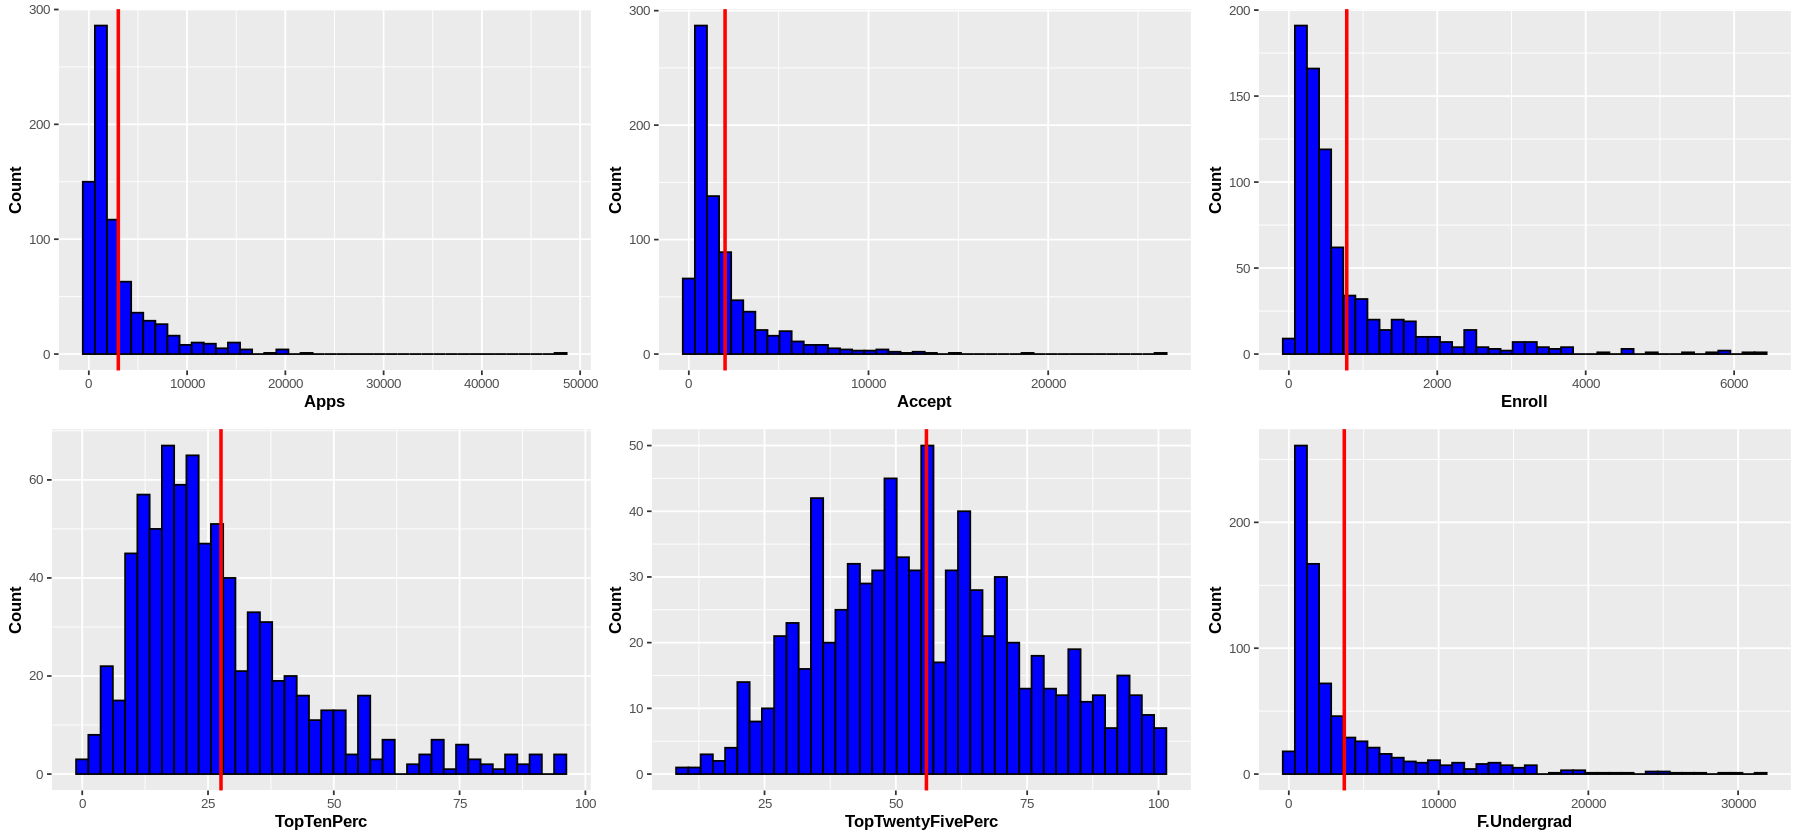

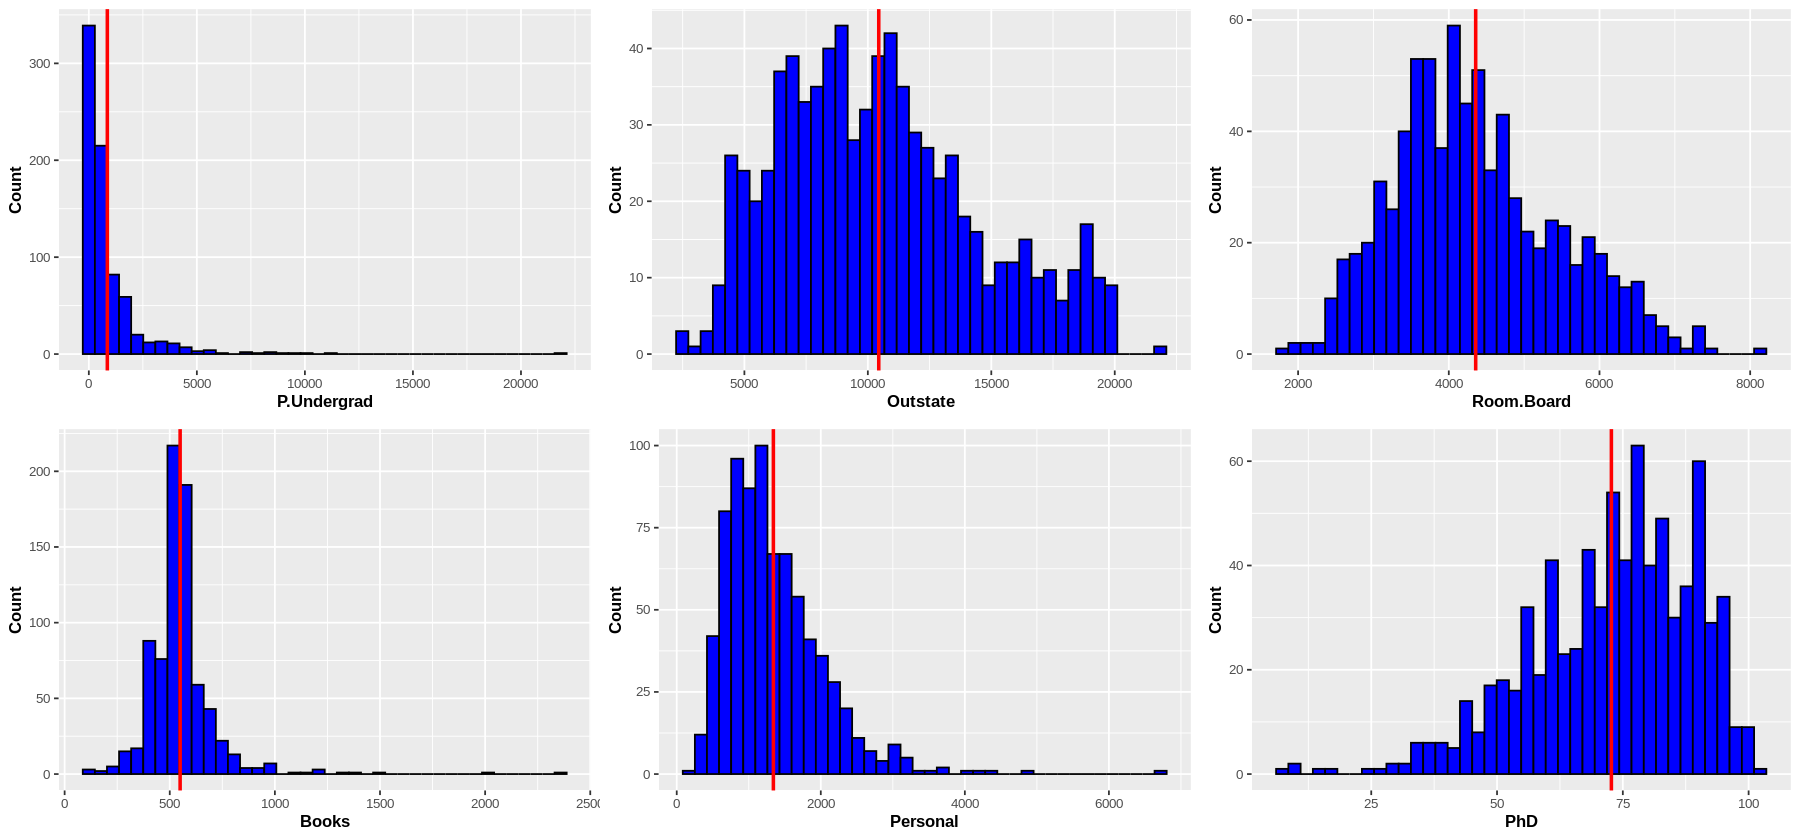

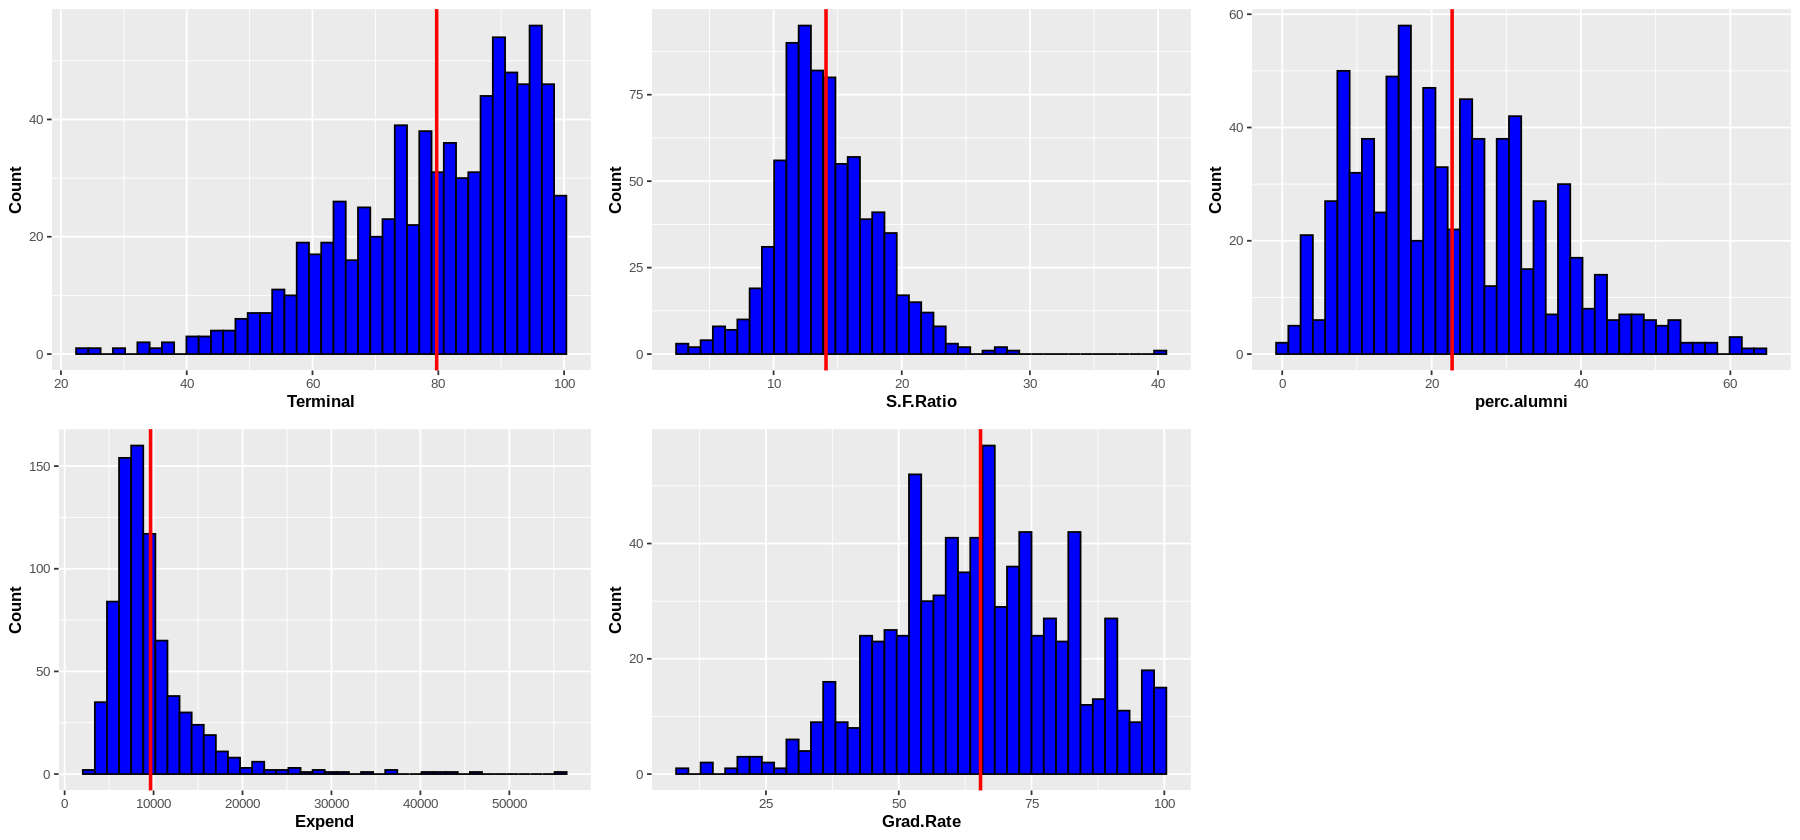

In [8]:
options(repr.plot.width = 15, repr.plot.height = 7)

Apps_hist <- ggplot(US_college_data, aes(x = Apps)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(Apps)), col = "red", size = 1) +
  xlab("Apps") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

Accept_hist <- ggplot(US_college_data, aes(x = Accept)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(Accept)), col = "red", size = 1) +
  xlab("Accept") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

Enroll_hist <- ggplot(US_college_data, aes(x = Enroll)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(Enroll)), col = "red", size = 1) +
  xlab("Enroll") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

Top10perc_hist <- ggplot(US_college_data, aes(x = TopTenPerc)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(TopTenPerc)), col = "red", size = 1) +
  xlab("TopTenPerc") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

Top25perc_hist <- ggplot(US_college_data, aes(x = TopTwentyFivePerc)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(TopTwentyFivePerc)), col = "red", size = 1) +
  xlab("TopTwentyFivePerc") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

F.Undergrad_hist <- ggplot(US_college_data, aes(x = F.Undergrad)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(F.Undergrad)), col = "red", size = 1) +
  xlab("F.Undergrad") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

P.Undergrad_hist <- ggplot(US_college_data, aes(x = P.Undergrad)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(P.Undergrad)), col = "red", size = 1) +
  xlab("P.Undergrad") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

Outstate_hist <- ggplot(US_college_data, aes(x = Outstate)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(Outstate)), col = "red", size = 1) +
  xlab("Outstate") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

Room.Board_hist <- ggplot(US_college_data, aes(x = Room.Board)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(Room.Board)), col = "red", size = 1) +
  xlab("Room.Board") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

Books_hist <- ggplot(US_college_data, aes(x = Books)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(Books)), col = "red", size = 1) +
  xlab("Books") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

Personal_hist <- ggplot(US_college_data, aes(x = Personal)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(Personal)), col = "red", size = 1) +
  xlab("Personal") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

PhD_hist <- ggplot(US_college_data, aes(x = PhD)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(PhD)), col = "red", size = 1) +
  xlab("PhD") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

Terminal_hist <- ggplot(US_college_data, aes(x = Terminal)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(Terminal)), col = "red", size = 1) +
  xlab("Terminal") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

S.F.Ratio_hist <- ggplot(US_college_data, aes(x = S.F.Ratio)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(S.F.Ratio)), col = "red", size = 1) +
  xlab("S.F.Ratio") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

perc.alumni_hist <- ggplot(US_college_data, aes(x = perc.alumni)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(perc.alumni)), col = "red", size = 1) +
  xlab("perc.alumni") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

Expend_hist <- ggplot(US_college_data, aes(x = Expend)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(Expend)), col = "red", size = 1) +
  xlab("Expend") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 

Grad.Rate_hist <- ggplot(US_college_data, aes(x = Grad.Rate)) +
  geom_histogram(bins = 40, color = "black", fill = "blue") +
  geom_vline(aes(xintercept = mean(Grad.Rate)), col = "red", size = 1) +
  xlab("Grad.Rate") +
  ylab("Count") +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) 


plot_grid(Apps_hist,Accept_hist,Enroll_hist, Top10perc_hist, Top25perc_hist, F.Undergrad_hist)
plot_grid(P.Undergrad_hist,Outstate_hist,Room.Board_hist, Books_hist,Personal_hist,PhD_hist)
plot_grid(Terminal_hist,S.F.Ratio_hist,perc.alumni_hist, Expend_hist,Grad.Rate_hist)


It appears that Apps, Accept, Enroll, TopTenPerc, Books, F.Undergrad, P.Undergrad, Personal, and Expend are right skewed. TopTwentyFivePerc, Outstate, Room.Board, S.F.Ratio, perc.alumni, and Grad.Rate all appear to be at least somewhat normally distributed. PhD and Terminal appear to be left skewed.

In [9]:
private_gradrate_means <- US_college_data %>% select(Private, Grad.Rate) %>% group_by(Private) %>% summarise(mean = mean(Grad.Rate))
private_gradrate_means

Private,mean
<fct>,<dbl>
No,56.04245
Yes,68.91135


The mean graduation rates of private and non-private school appear to be quite different. Let's construct some boxplots to assess the difference in their Grad.Rate distributions.

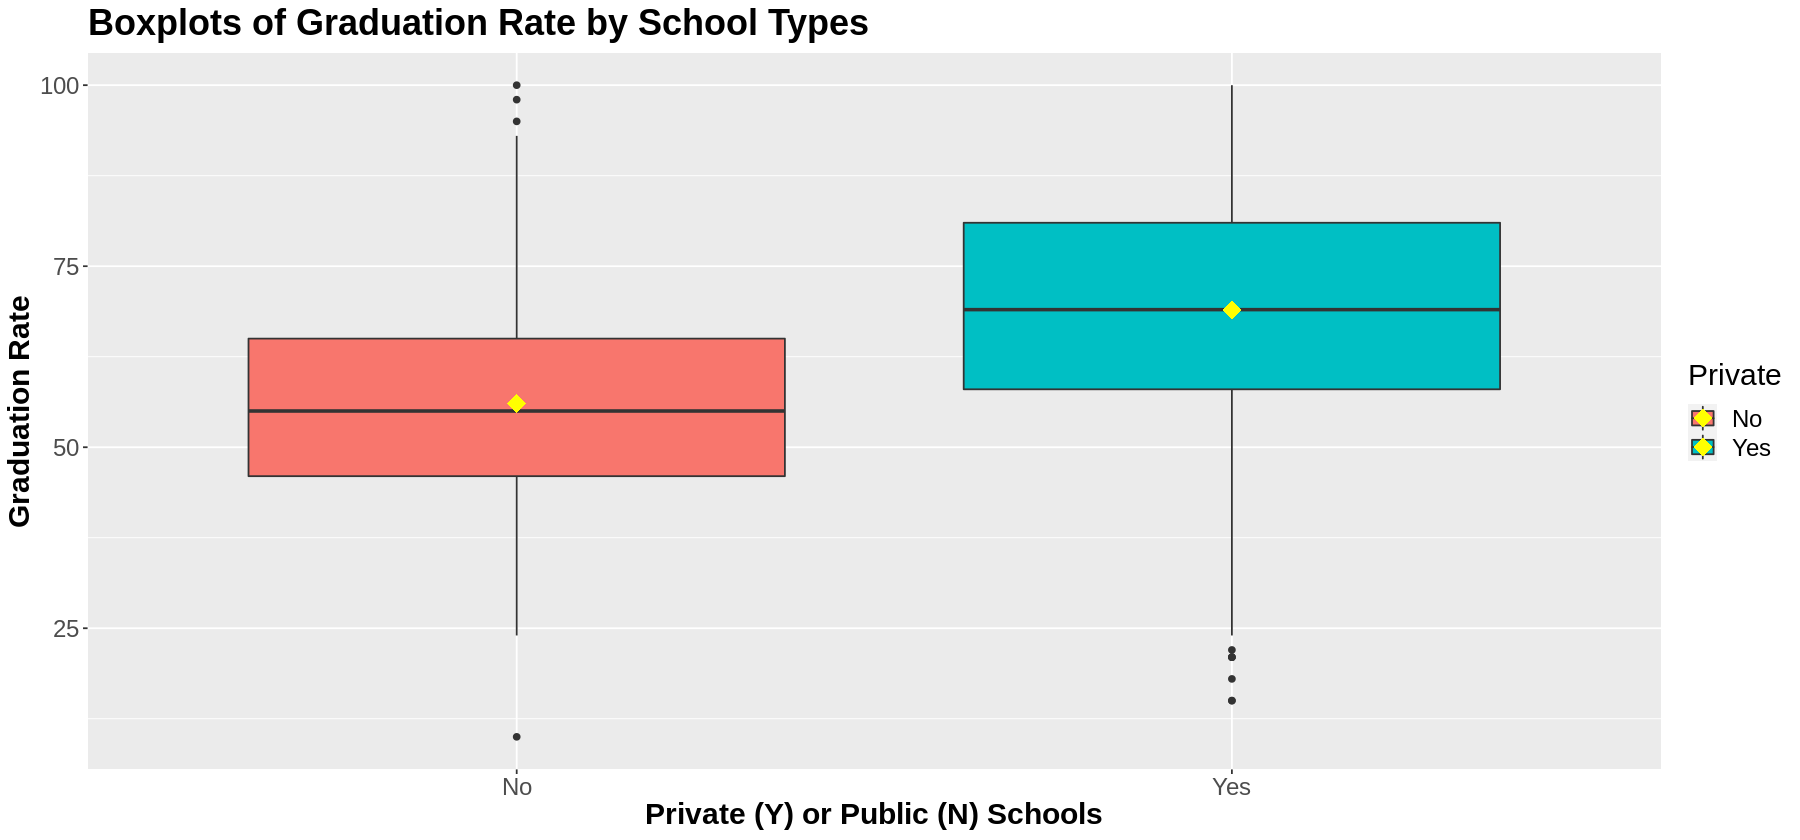

In [10]:
private_gradrate_boxplots <- US_college_data %>%
  ggplot() +
  geom_boxplot(aes(Private, Grad.Rate, fill = Private)) +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Boxplots of Graduation Rate by School Types") +
  xlab("Private (Y) or Public (N) Schools") +
  ylab("Graduation Rate") +
  stat_summary(aes(Private, Grad.Rate, fill = Private),
    fun = mean, colour = "yellow", geom = "point",
    shape = 18, size = 5
  )


private_gradrate_boxplots

There does appear to be a difference in graduation rates between private school and non-private schools, with the observed mean and median graduation rates of private schools being higher than non-private schools. In addition, the interquartile range of graduation rates for private schools appears to be slightly larger than for non-private schools, suggesting that graduation rates for private schools could have a greater spread.

In [11]:
# Find school with higher than 100% grad rate. 
head(arrange(select(US_college_data, Grad.Rate), desc(Grad.Rate)), 5)

# This just d/n make sense, remove? REMOVE THIS!

,Grad.Rate
,<dbl>
Amherst College,100
College of Mount St. Joseph,100
Grove City College,100
Harvard University,100
Harvey Mudd College,100


## Correlations between variables

We will now assess collinearity between different variables with pairplots and a heatmap.

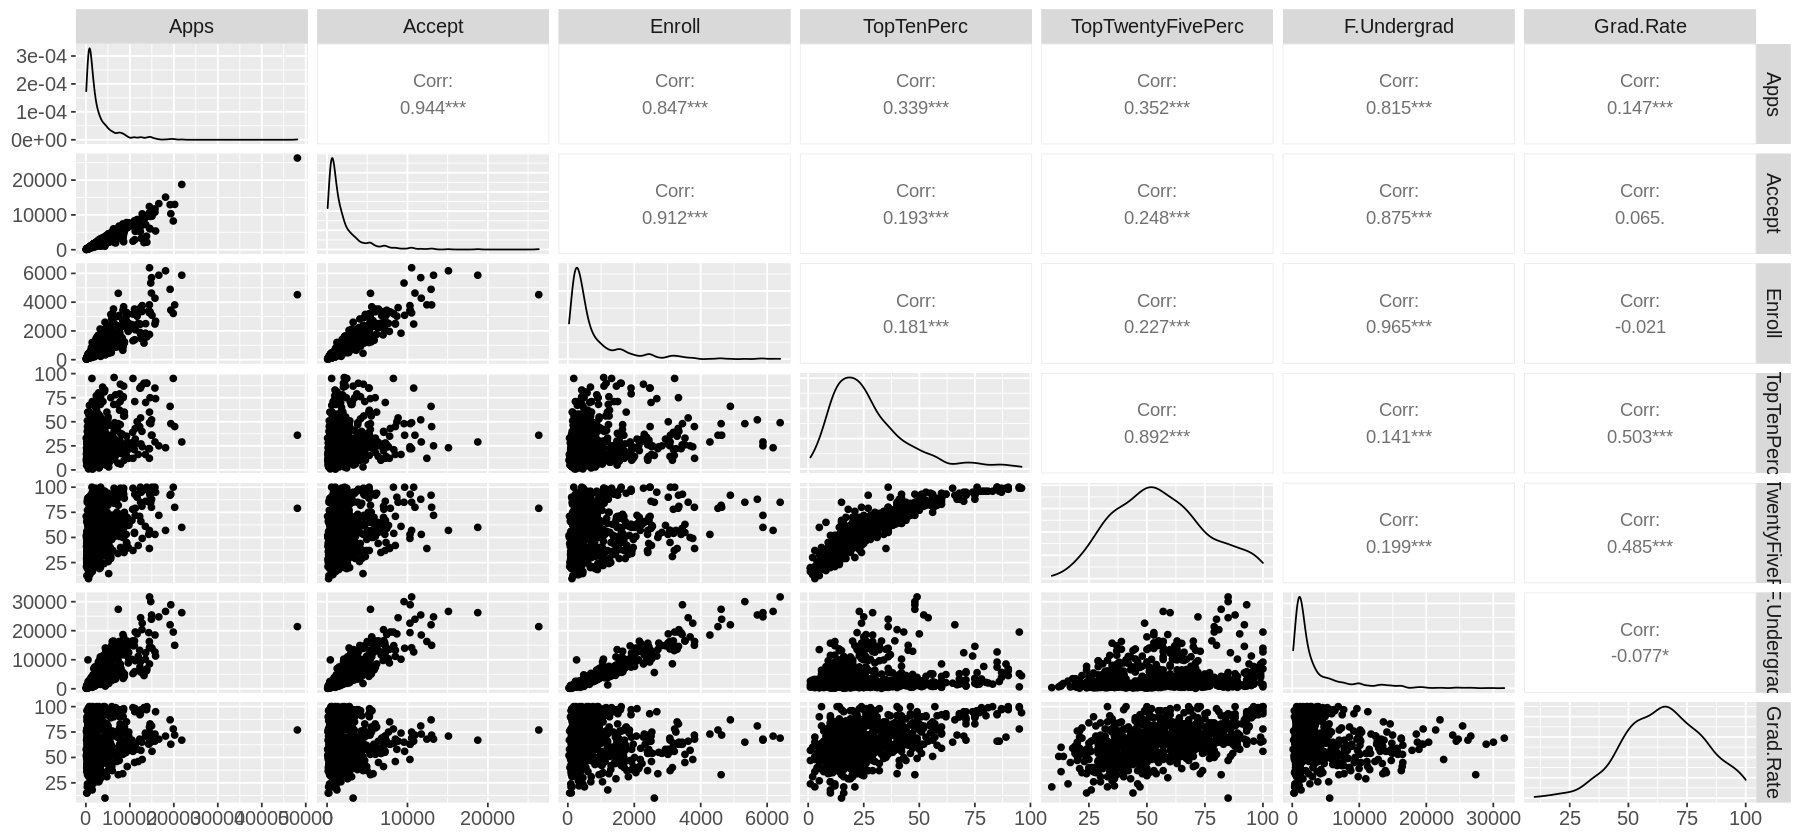

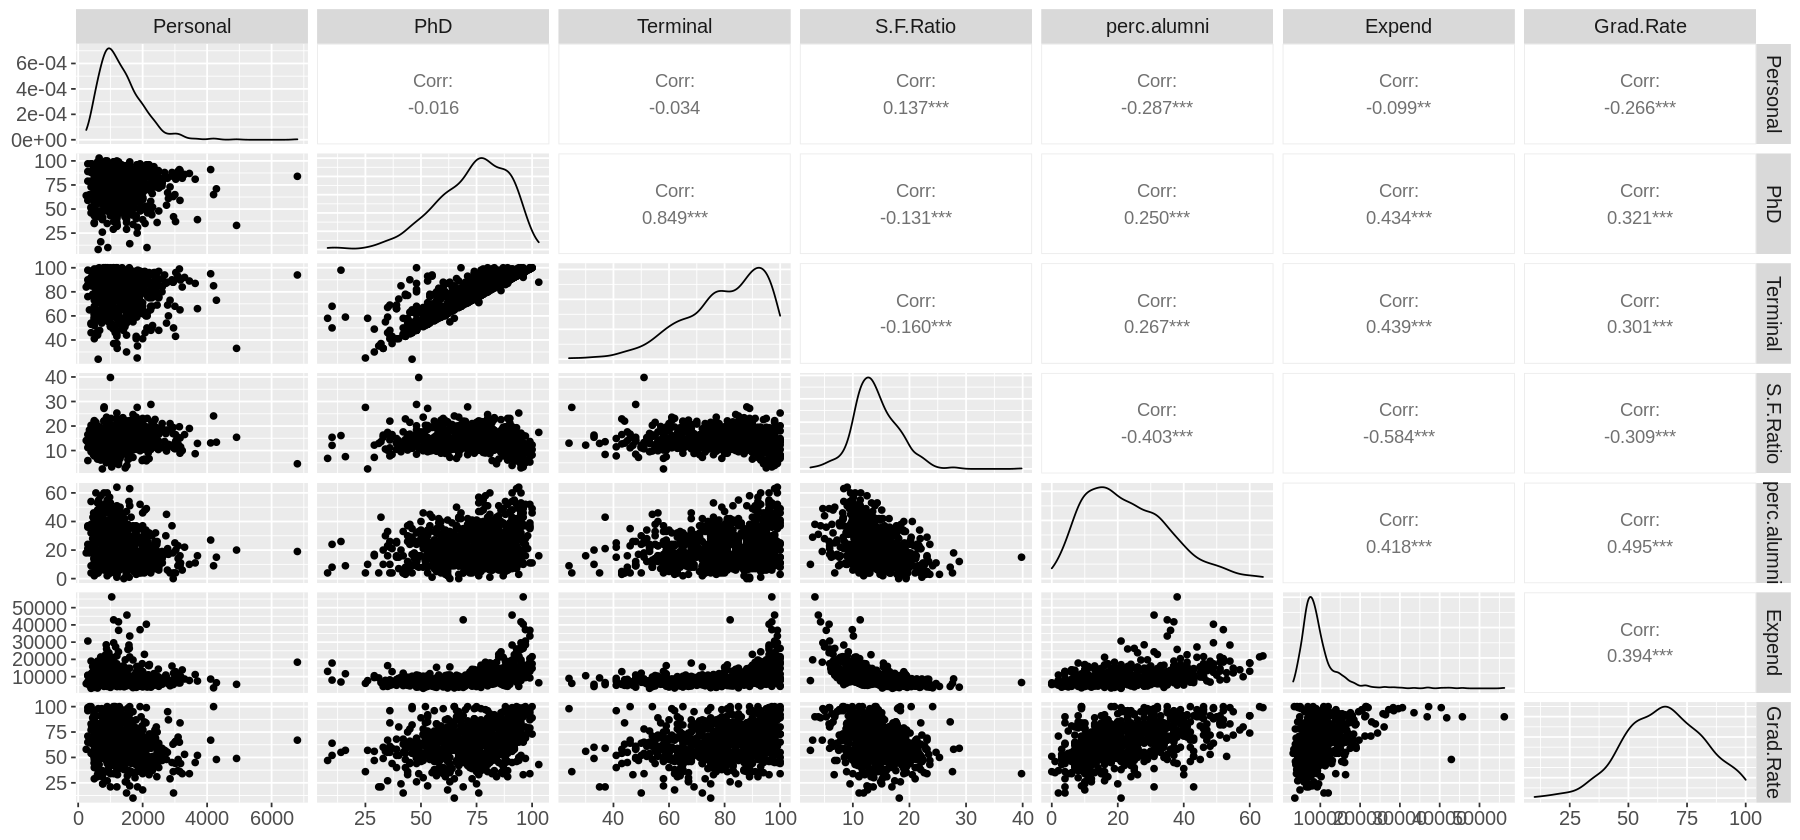

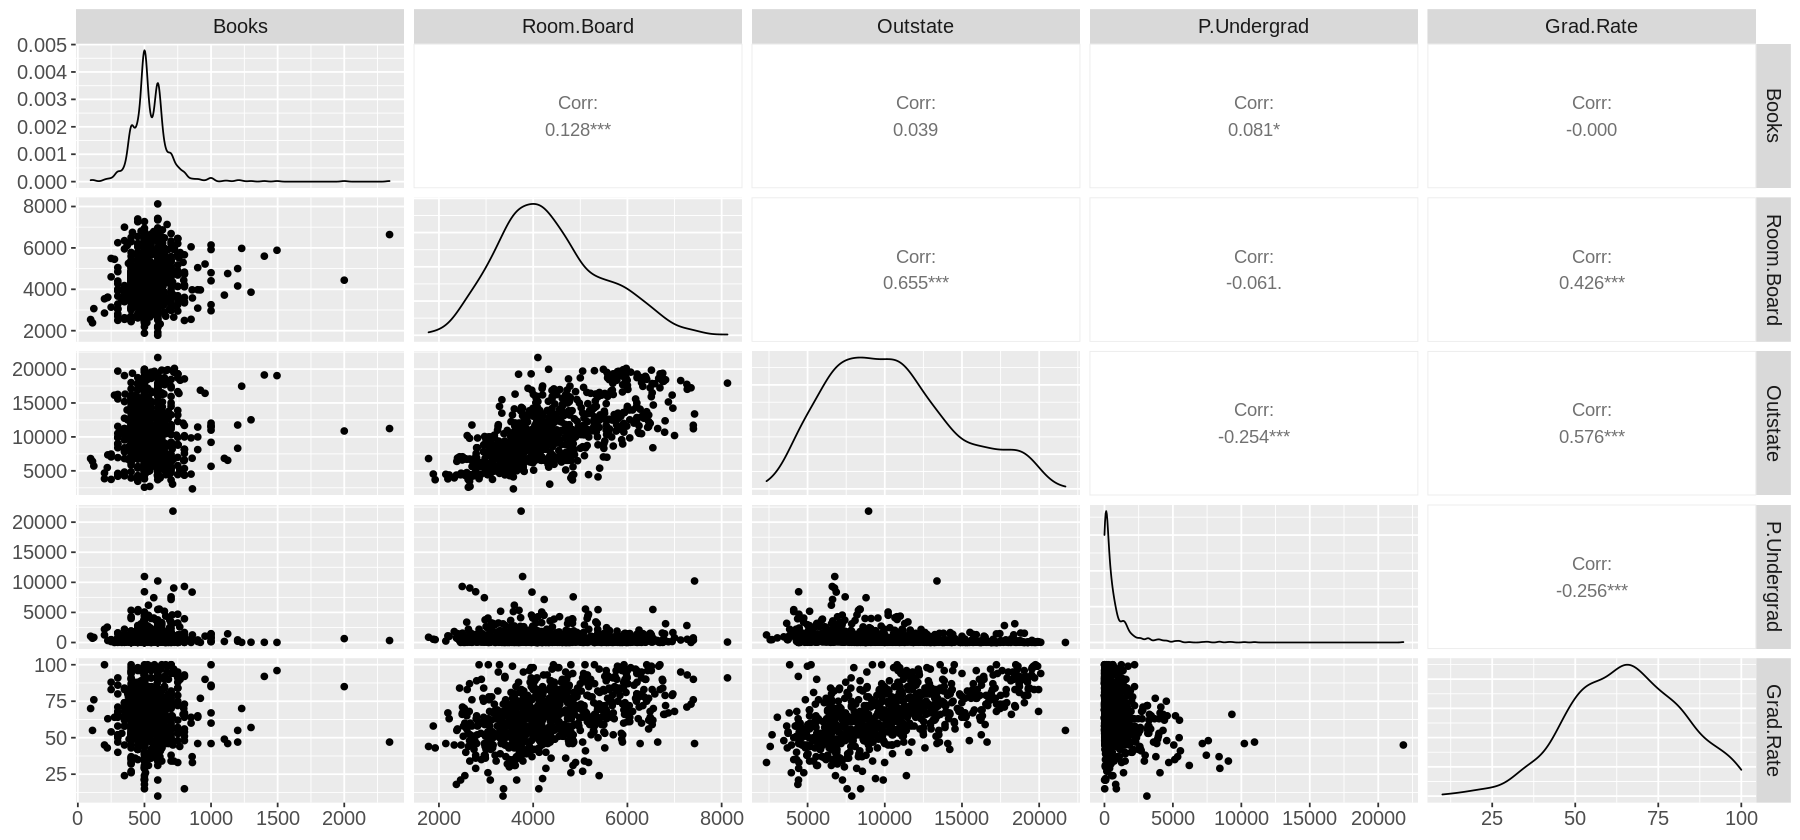

In [12]:
US_college_data_pairplots1 <- select(US_college_data, -Private, -Expend, -perc.alumni, -S.F.Ratio, -Terminal, 
                                     -PhD, -Personal, -Books, -Room.Board, -Outstate, -P.Undergrad) %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

US_college_data_pairplots2 <- select(US_college_data, -Private, -Apps, -Accept, -Enroll, -TopTenPerc, -TopTwentyFivePerc,  
                                      -Books, -Room.Board, -Outstate, -P.Undergrad, -F.Undergrad) %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

US_college_data_pairplots3 <- select(US_college_data,  Books, Room.Board, Outstate, P.Undergrad, Grad.Rate) %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

US_college_data_pairplots1
US_college_data_pairplots2
US_college_data_pairplots3

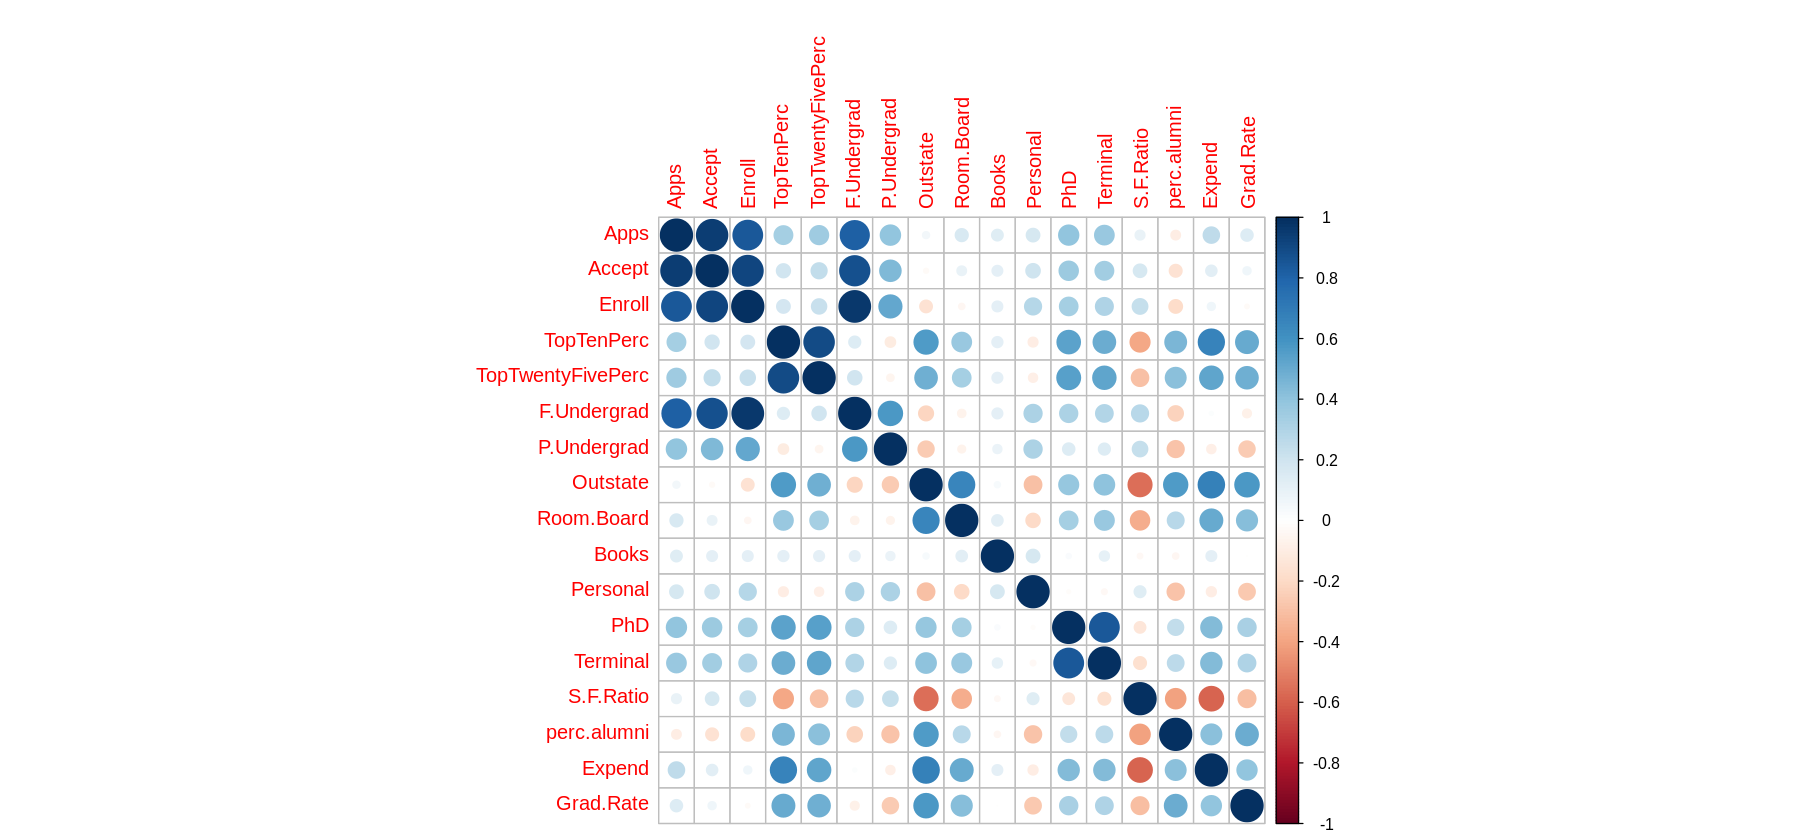

In [13]:
US_college_data_correlations <- cor(select(US_college_data, -Private))

corrplot(US_college_data_correlations)

The two plots above indicate that there are some variables that are highly correlated. Accept and Apps, Enroll and Apps, F.Undergrad and Apps, Enroll and Accept, F.Undergrad and Accept, F.Undergrad and Enroll, TopTwentyFivePerc and TopTenPerc, and Terminal and PhD have relatively high correlations This is important to point out because it could have an impact on the standard errors of the slope coefficients produced by our linear models. However, some of the variables are expected to have high correlations by their nature, such as TopTwentyFivePerc and TopTenPerc since they are measuring the same thing, but in different quantities. 

## Model Selection

Split Training and Testing (70-30% Basis) to assess prediciton performance.

In [14]:
set.seed(1337)

US_college_data_index <- createDataPartition(US_college_data$Grad.Rate, p = 0.70, list = FALSE)

training_college <- US_college_data[US_college_data_index, ]
testing_college <- US_college_data[-US_college_data_index, ]


head(training_college,3)
head(testing_college,3)


,Private,Apps,Accept,Enroll,TopTenPerc,TopTwentyFivePerc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


,Private,Apps,Accept,Enroll,TopTenPerc,TopTwentyFivePerc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Alfred University,Yes,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73
Allentown Coll. of St. Francis de Sales,Yes,1179,780,290,38,64,1130,638,9690,4785,600,1000,60,84,13.3,21,7940,74


##### We will be using LOOCV cross validation

In [15]:
train_control_LV <- trainControl(method = "LOOCV")

### Full Model

In [45]:
set.seed(1337)


full_cv_LV <- train(
    form = Grad.Rate ~ . , data = training_college,
    trControl = train_control_LV,
    method = "lm")

full_RMSE <- full_cv_LV$results$RMSE
summary(full_cv_LV$finalModel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.014  -7.308  -0.477   7.266  43.034 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.054e+01  5.587e+00   5.465 7.14e-08 ***
PrivateYes         3.663e+00  1.895e+00   1.932 0.053858 .  
Apps               1.681e-03  5.761e-04   2.919 0.003664 ** 
Accept            -8.587e-04  9.917e-04  -0.866 0.386931    
Enroll            -8.629e-05  2.555e-03  -0.034 0.973071    
TopTenPerc         9.988e-02  8.245e-02   1.211 0.226265    
TopTwentyFivePerc  6.718e-02  6.261e-02   1.073 0.283800    
F.Undergrad       -3.735e-04  4.308e-04  -0.867 0.386248    
P.Undergrad       -1.402e-03  4.158e-04  -3.372 0.000802 ***
Outstate           1.136e-03  2.780e-04   4.089 5.02e-05 ***
Room.Board         1.422e-03  6.936e-04   2.051 0.040783 *  
Books             -4.254e-03  3.462e-03  -1.229 0.219705    
Personal          -4.801e-04  8.613e-04  -0.557 0.57

### Backwards Step-wise Selection

In [17]:
set.seed(1337)
back_cv_LV <- train(Grad.Rate ~ ., data = training_college,
                    method = "leapBackward", 
                    tuneGrid = data.frame(nvmax = 1:17),
                    trControl = train_control_LV
                    )

In [18]:
#Model with the best performance selected by backward selection
back_cv_LV$bestTune

summary(back_cv_LV$finalModel)

,nvmax
,<int>
11,11


Subset selection object
17 Variables  (and intercept)
                  Forced in Forced out
PrivateYes            FALSE      FALSE
Apps                  FALSE      FALSE
Accept                FALSE      FALSE
Enroll                FALSE      FALSE
TopTenPerc            FALSE      FALSE
TopTwentyFivePerc     FALSE      FALSE
F.Undergrad           FALSE      FALSE
P.Undergrad           FALSE      FALSE
Outstate              FALSE      FALSE
Room.Board            FALSE      FALSE
Books                 FALSE      FALSE
Personal              FALSE      FALSE
PhD                   FALSE      FALSE
Terminal              FALSE      FALSE
S.F.Ratio             FALSE      FALSE
perc.alumni           FALSE      FALSE
Expend                FALSE      FALSE
1 subsets of each size up to 11
Selection Algorithm: backward
          PrivateYes Apps Accept Enroll TopTenPerc TopTwentyFivePerc
1  ( 1 )  " "        " "  " "    " "    " "        " "              
2  ( 1 )  " "        " "  " "    " "    " " 

In [41]:
set.seed(1337)
back_red_cv_LV <- train(
    form = Grad.Rate ~ Private + Apps + TopTenPerc + F.Undergrad + P.Undergrad + Outstate + Room.Board + Books +
        PhD + perc.alumni + Expend, data = training_college,
    trControl = train_control_LV,
    method = "lm")

back_RMSE <- full_cv_LV$results$RMSE
summary(back_red_cv_LV)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.576  -7.699  -0.542   7.488  43.422 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.7787068  3.6386932   9.283  < 2e-16 ***
PrivateYes   3.3633121  1.8545522   1.814 0.070310 .  
Apps         0.0012701  0.0003404   3.731 0.000211 ***
TopTenPerc   0.1804311  0.0469974   3.839 0.000138 ***
F.Undergrad -0.0004975  0.0002576  -1.932 0.053918 .  
P.Undergrad -0.0014064  0.0004091  -3.437 0.000633 ***
Outstate     0.0010555  0.0002635   4.006 7.05e-05 ***
Room.Board   0.0014767  0.0006788   2.175 0.030036 *  
Books       -0.0049500  0.0033509  -1.477 0.140208    
PhD          0.0901136  0.0443935   2.030 0.042865 *  
perc.alumni  0.3059181  0.0571976   5.348 1.32e-07 ***
Expend      -0.0005153  0.0001460  -3.529 0.000454 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.21 on 533 degrees of freedom
Multi

### Forwards Step-wise Selection

In [20]:
set.seed(1337)
forw_cv_LV <- train(Grad.Rate ~ ., data = training_college,
                    method = "leapForward", 
                    tuneGrid = data.frame(nvmax = 1:17),
                    trControl = train_control_LV
                    )

In [21]:
#Model with the best performance selected by forward selection
forw_cv_LV$bestTune

summary(forw_cv_LV$finalModel)

,nvmax
,<int>
12,12


Subset selection object
17 Variables  (and intercept)
                  Forced in Forced out
PrivateYes            FALSE      FALSE
Apps                  FALSE      FALSE
Accept                FALSE      FALSE
Enroll                FALSE      FALSE
TopTenPerc            FALSE      FALSE
TopTwentyFivePerc     FALSE      FALSE
F.Undergrad           FALSE      FALSE
P.Undergrad           FALSE      FALSE
Outstate              FALSE      FALSE
Room.Board            FALSE      FALSE
Books                 FALSE      FALSE
Personal              FALSE      FALSE
PhD                   FALSE      FALSE
Terminal              FALSE      FALSE
S.F.Ratio             FALSE      FALSE
perc.alumni           FALSE      FALSE
Expend                FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: forward
          PrivateYes Apps Accept Enroll TopTenPerc TopTwentyFivePerc
1  ( 1 )  " "        " "  " "    " "    " "        " "              
2  ( 1 )  " "        " "  " "    " "    " "  

In [42]:
set.seed(1337)
forw_red_cv_LV <- train(
    form = Grad.Rate ~ Private + Apps + TopTenPerc + TopTwentyFivePerc + F.Undergrad + P.Undergrad + Outstate + Room.Board +
        PhD + perc.alumni + Expend, data = training_college,
    trControl = train_control_LV,
    method = "lm")

forw_RMSE <- full_cv_LV$results$RMSE
summary(forw_red_cv_LV)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-47.992  -7.589  -0.499   7.463  41.309 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       30.1620383  3.4645136   8.706  < 2e-16 ***
PrivateYes         3.3158946  1.8567016   1.786 0.074683 .  
Apps               0.0012882  0.0003408   3.780 0.000175 ***
TopTenPerc         0.1220261  0.0777026   1.570 0.116910    
TopTwentyFivePerc  0.0516809  0.0612030   0.844 0.398815    
F.Undergrad       -0.0005374  0.0002581  -2.082 0.037825 *  
P.Undergrad       -0.0014388  0.0004095  -3.514 0.000479 ***
Outstate           0.0010724  0.0002635   4.070 5.42e-05 ***
Room.Board         0.0013312  0.0006736   1.976 0.048640 *  
PhD                0.0900274  0.0446966   2.014 0.044492 *  
perc.alumni        0.3103012  0.0571696   5.428 8.68e-08 ***
Expend            -0.0004987  0.0001500  -3.325 0.000944 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05

### Ridge and LASSO Regressions

We remove the Private variable in this case because it is inflating the standard error values of the slope coefficients in our linear models.

In [23]:
set.seed(1337)

X_train<- model.matrix(object = Grad.Rate ~ Apps + Accept + Enroll + TopTenPerc + TopTwentyFivePerc + F.Undergrad + P.Undergrad + Outstate +
                           Room.Board + Books + Personal + PhD + Terminal + S.F.Ratio + perc.alumni + Expend,
  data = training_college)[, -1]

Y_train <- training_college[, "Grad.Rate"]

In [24]:
set.seed(1337)

# Build the models
ridge_cv_LV <- train(
  y = Y_train,
  x = X_train,
  data = training_college, method = "glmnet",
  trControl = train_control_LV,
  tuneGrid = expand.grid(alpha = 0, lambda = exp(seq(-5, 10, 0.1)))
  )

lasso_cv_LV <- train(
  y = Y_train,
  x = X_train, 
  data = training_college, method = "glmnet",
  trControl = train_control_LV,
  tuneGrid = expand.grid(alpha = 1, lambda = exp(seq(-5, 10, 0.1)))
  )

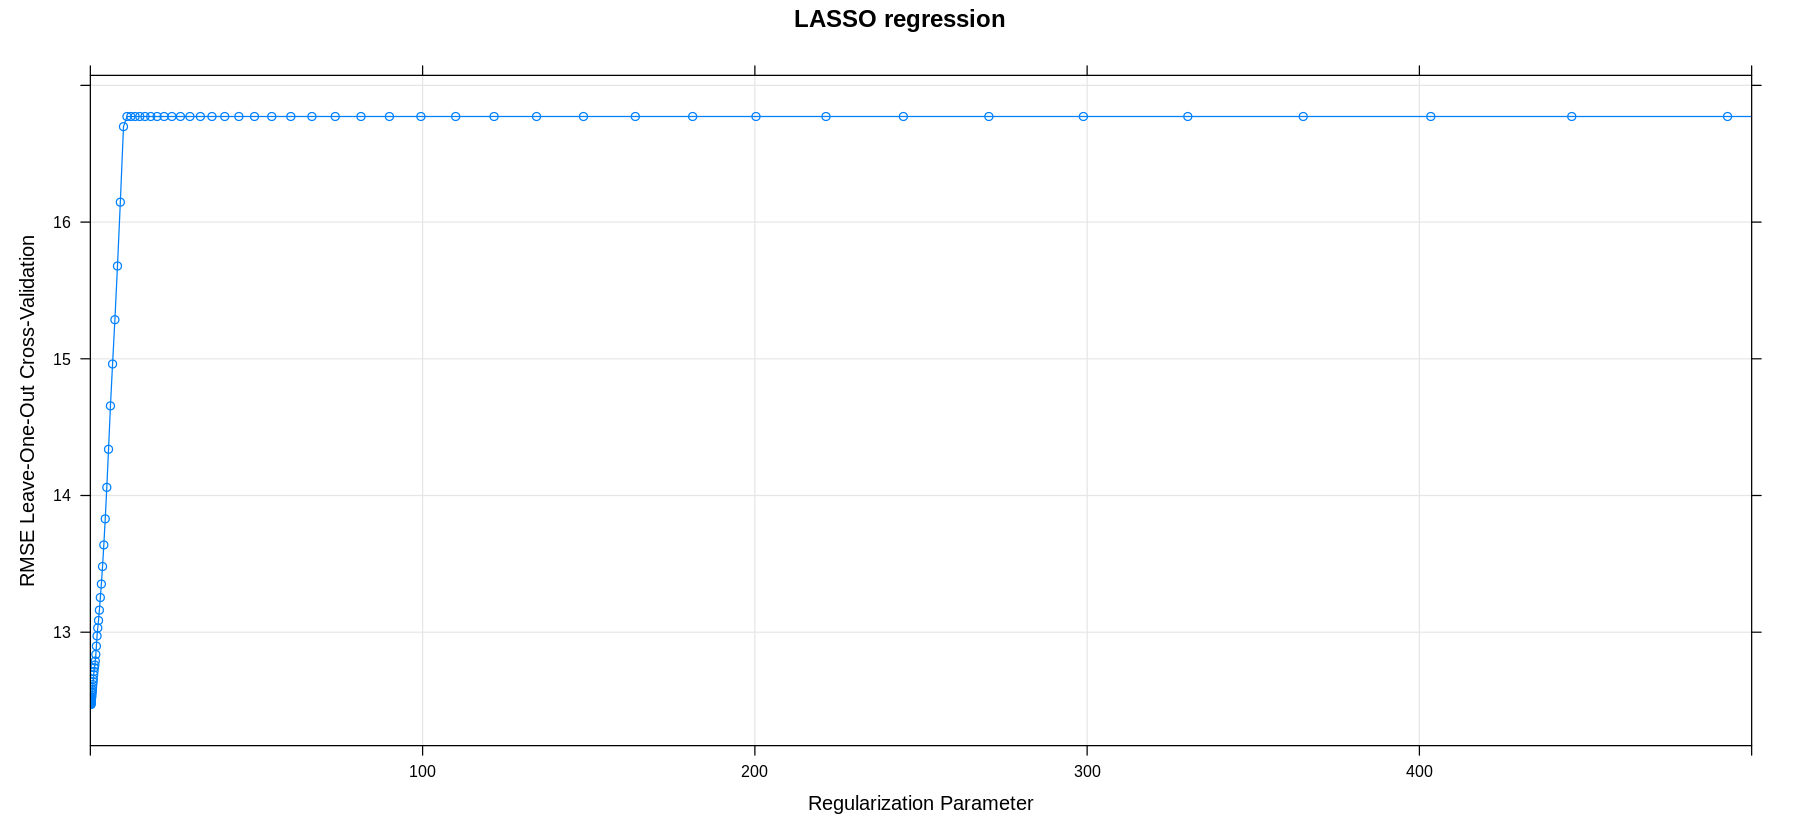

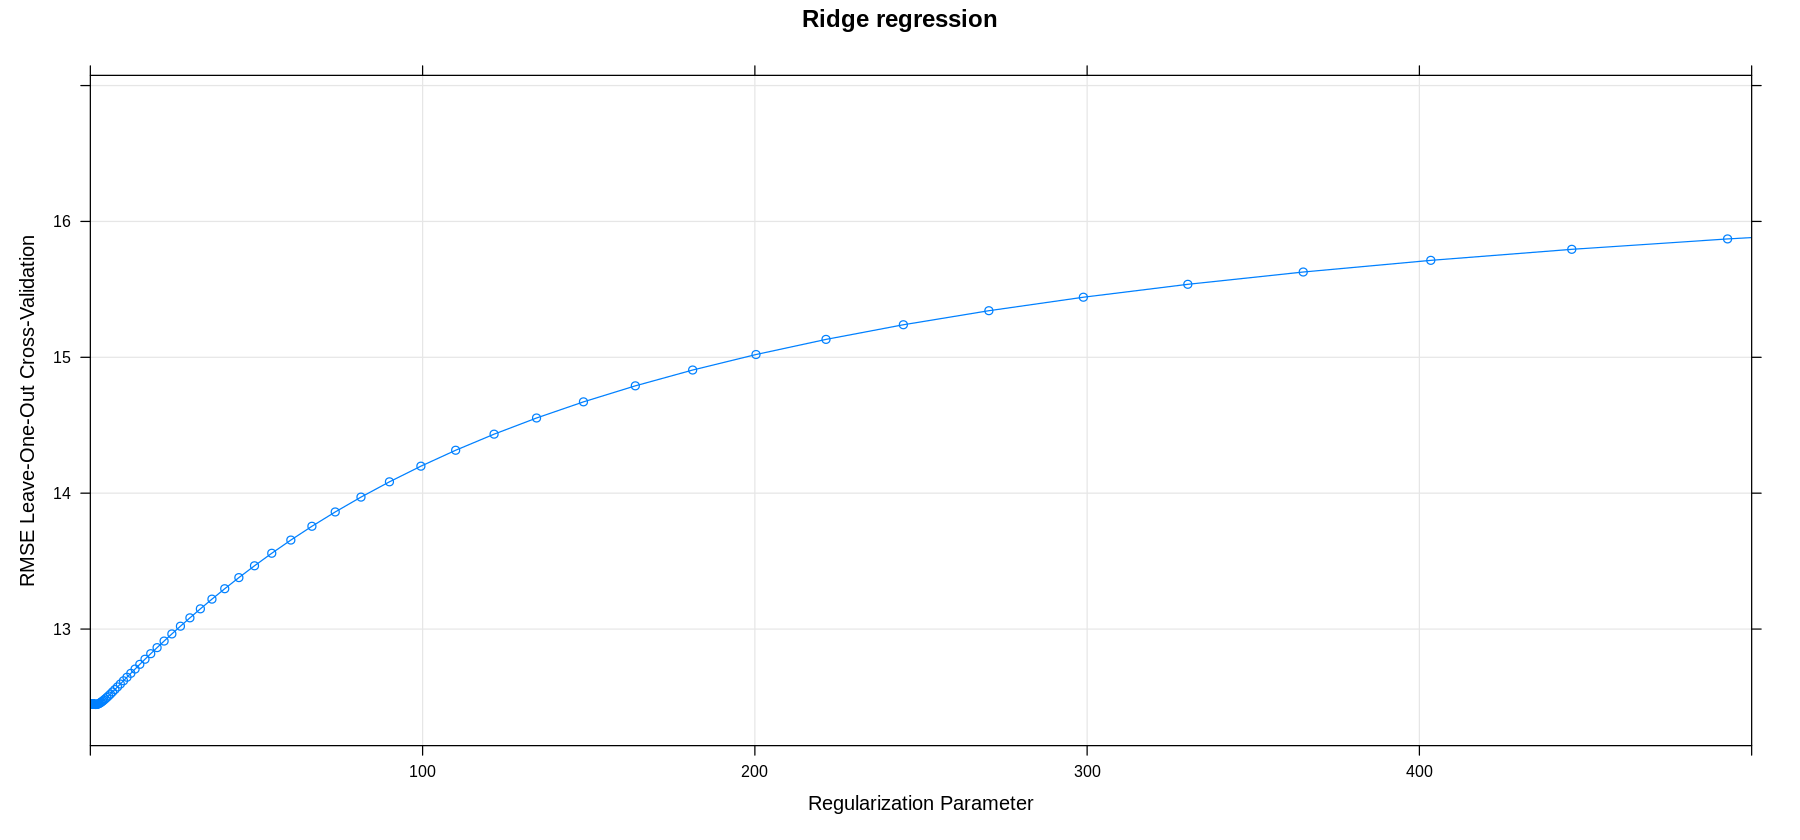

In [25]:
plot(lasso_cv_LV, xlim=c(0,500), main = "LASSO regression")

plot(ridge_cv_LV, xlim=c(0,500), main = "Ridge regression")

According to the plots above, it appears that ridge regression provides smaller RMSE's for almost all lambda values between 0 and 500, suggesting that ridge regression could be the superior option.

In [26]:
best_lambda = tibble('Best Ridge Lambda' = round(ridge_cv_LV$bestTune$lambda, 4), 'Best Lasso Lambda' = round(lasso_cv_LV$bestTune$lambda, 4))
best_lambda

Best Ridge Lambda,Best Lasso Lambda
<dbl>,<dbl>
1.6487,0.1653


It is also important to note that the lambdas produced by the two algorthims are quite different.

In [27]:
set.seed(1337)
ridge_min_cv_LV <- train(
  y = Y_train,
  x = X_train,
  data = training_college, method = "glmnet",
  trControl = train_control_LV,
  tuneGrid = expand.grid(alpha = 0, lambda = ridge_cv_LV$bestTune$lambda)
  )

lasso_min_cv_LV <- train(
  y = Y_train,
  x = X_train, 
  data = training_college, method = "glmnet",
  trControl = train_control_LV,
  tuneGrid = expand.grid(alpha = 1, lambda = lasso_cv_LV$bestTune$lambda)
  )

In [43]:
ridge_RMSE <- full_cv_LV$results$RMSE
lasso_RMSE <- full_cv_LV$results$RMSE

ridge_min_cv_LV
lasso_min_cv_LV

glmnet 

545 samples
 16 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 544, 544, 544, 544, 544, 544, ... 
Resampling results:

  RMSE      Rsquared   MAE   
  12.44485  0.4474784  9.4962

Tuning parameter 'alpha' was held constant at a value of 0
Tuning
 parameter 'lambda' was held constant at a value of 1.648721

glmnet 

545 samples
 16 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 544, 544, 544, 544, 544, 544, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  12.47117  0.4451071  9.508126

Tuning parameter 'alpha' was held constant at a value of 1
Tuning
 parameter 'lambda' was held constant at a value of 0.1652989

### Model Prediction Performance Using RMSE from CV

Now, we will calculate the RMSE values of each model to assess which model(s) have the best performance.

In [58]:
full_R_MSE_model <- 
  tibble(
    Model = "OLS Full Regression",
    R_MSE = full_RMSE
)

      
forw_R_MSE_model <-
  tibble(
    Model = "OLS Reduced Regression with Forward Selection",
    R_MSE = forw_RMSE
)
      
back_R_MSE_model <-
  tibble(
    Model = "OLS Reduced Regression with backward Selection",
    R_MSE = back_RMSE
)

ridge_R_MSE_model <-
  tibble(
    Model = "Ridge Regression with minimum MSE",
    R_MSE = ridge_RMSE
)

lasso_R_MSE_model <-
  tibble(
    Model = "Lasso Regression with minimum MSE",
    R_MSE = lasso_RMSE
)
  


In [59]:
R_MSE_Models <- rbind(full_R_MSE_model, forw_R_MSE_model, back_R_MSE_model, ridge_R_MSE_model, lasso_R_MSE_model)

In [60]:
arrange(R_MSE_Models, R_MSE)

Model,R_MSE
<chr>,<dbl>
OLS Reduced Regression with backward Selection,12.36138
OLS Reduced Regression with Forward Selection,12.38662
Ridge Regression with minimum MSE,12.44485
Lasso Regression with minimum MSE,12.47117
OLS Full Regression,12.52974


##### Here we can see our Backward selection model provides us with the best RMSE on the cross validated models. This is used with the validation set provided by LOOCV.

### Prediction

In [29]:
set.seed(1337)


#Reduced Backward Predictions
back_cv_LV_pred <- predict(back_red_cv_LV, 
                           newdata =
                               select(testing_college, -Accept, -Enroll, -TopTwentyFivePerc, -Personal, -S.F.Ratio, -Terminal)
                          )


### Results

In [63]:
back_R_MSE_model <-
  tibble(
    Model = "OLS Reduced Regression with backward Selection",
    R_MSE = rmse(
      preds = back_cv_LV_pred,
      actuals = testing_college$Grad.Rate
    )
)

back_R_MSE_model

Model,R_MSE
<chr>,<dbl>
OLS Reduced Regression with backward Selection,13.69868


## METHODS
   The report is trustworthy due to the dataset’s high authority and breadth of coverage. The data is obtained from the US News and World Report which has now 73 years of history and has “been known primarily for its influential ranking and annual reports of colleges and graduate schools” (Wikipedia contributors, 2021). Additionally, the data covers 777 colleges which is sufficient for the use of CLT and therefore satisfies the assumption of normality. 
   
   Predictive models are built and trained in order to predict new observations. We built and trained our model on two separate datasets: a training and testing set. In order to create these we split the data set into two portions (70% training set and 30% testing set). Firstly we created a full model that included all inputs; this will be our full additive model. After using `predict()` we obtained the predicted values. We calculated the RMSE on the test set to be 13.61. The RMSE finds the standard deviation of the prediction errors $y_i = \hat{y}_i$ and has the same units as our response variable; graduation rate. The smaller this value is, the better because it means that our predicted values are closer to the actual data. We used this quantity to evaluate the predictive model. We will be calculating RMSE on each of our models in order to evaluate and find the best possible model. 

We will use backward, forward, ridge and lasso algorithms to find smaller models and evaluate them against the full model using RMSE. The forward method using the `regsubsets()` function starts with the null model and *adds* variables one by one, and evaluates each of those models. The backwards method also uses `regsubsets()` but starts with the full model and *removes* variables at each step and evaluates them that way. 

The forward and backward methods will create 16 models and we will choose the best one by looking at the out-of-sample prediction accuracy. Mallow’s $C_p$ value tells us this value; by selecting the smallest $C_p$ value we will know the optimal number of variables to include for our models. We will conduct the $C_p$ test on the models created by both the forward and backward algorithms. The $C_p$ values found to be the most optimal are 13 and 11 for the forward and backward algorithms respectively. We then train the models selected by each algorithm using `lm()`. Using those trained models we predict the values of the testing set (we had created the test set earlier when splitting the original data) on them using the function `predict()`. Using the models found using these two algorithms we then calculated the RMSE to be 13.62, 13.69 for the forward and backwards methods respectively. The RMSE of the forward selection is larger than that of the full model so we expect that a subset of variables will not create the best possible model. 

The next algorithm we implemented was ridge regression. Since ridge is useful to address multicollinearity this method would be an asset to our research as some of our variables were highly correlated (ex. `Apps`, `Accept`, and `Enroll`). The function `cv.glmnet()` searches for potential values of the tuning parameter; lambda. Lambda controls how much the regression coefficients will be shrunk; however in the ridge algorithm, the coefficients will never shrink to zero. The lambda selected is 2.0138, this specific value of lambda provides the model with the smallest test MSE using cross-validation methods. The RMSE value is calculated to be 13.57. 
    Next, we use the lasso regression model. In this method, coefficients are able to shrink to zero, so this model may use a smaller subset of variables than the previous methods did. First we find the lambda that minimizes the MSE using cross-validation methods; we found it to be 0.1496. Lastly, we calculate RMSE once again (13.60) and with that we are able to compare the different RMSE to find the best predictive model. After comparing the RMSE of each model we found that the Ridge Regression had the lowest RMSE. Therefore according to our investigation the ridge model is the best model to predict graduation rate with. 

## DISCUSSION

The results from our final table were both expected and unexpected. We expected the Ridge regression model to have the least test RMSE since it is often used to address multicollinearity problems. As we can see from the ggpairs plot, few of the input variables such as Apps, Accept, and Enroll are highly correlated with each other and therefore we had the intuition that the Ridge model would perform better than the other models before conducting any data analysis. Similarly, since we learned in lectures that shrinkage methods gain a lower variance to gain prediction performance at the cost of biased estimated coefficients, we also expected the Lasso model to outperform the full model as well as the stepwise algorithm models. 


However, we were not expecting the OLS full regression model to outperform the reduced and selected models by forward and backward selection. The stepwise algorithms are greedy algorithms and are generally considered impactful in that they aim to select the most significant inputs. From the printed summaries of the stepwise algorithms, we can see that they addressed the issue of multicollinearity by dropping variables that are highly correlated with each other. Neither of the selective models included “App”, “Accept” and “Enroll” with each other, which is something not done in fitting the full model. With the issue of multicollinearity out of the way, we were really anticipating the selective models to outperform the full model just like all the examples in our worksheets and tutorials. 


Additionally, we used the LOOCV method for data splitting and its ups and downs were apparent with our dataset. We see that it has zero randomness in its splits and it provides a much less biased measure of test RMSE compared to the hold-out method. As we train (n-1) observations in the training set, almost all the observations are used in fitting the model and therefore the bias will be lower which consequently avoids overestimating the test error rate. However, as we are feeding the model almost all the training data to learn, there is a lot of overlap between training sets. As a result, our estimates can be subject to high variance since the test error estimates are highly correlated. Another drawback that we noticed about the LOOCV is that it is computationally expensive. With a total of 777 observations, we were fitting 777 models to train and test, which took a while (2 ~ 3 minutes) for our computer to process. The computational time stacks up exponentially as we add in more observations and this is something that we will keep in mind in future research/projects.  


Lastly, while our findings were targeted towards answering our research question, it can also lead to other questions. 

* What policies can universities implement to increase their graduation rates? Students wishing to graduate with the best possible chance of success. Our data analysis provides intuition and understanding of the significance of the input variables which allows universities to evaluate their situation more efficiently and make further improvements to maximize graduation rates. 

* This information, if made available to high school counsellors or people who are currently wanting to apply to universities, can be used to predict their chances of graduating from the schools of their choice. 

* A large portion of UBC students commute from across BC to arrive at school. Research into whether commuting times increase or decrease graduation rates would be useful for learners to make decisions regarding housing, which university to attend, etc... This could help universities decide where to place a second campus (if applicable).



REFERENCES
1. James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, www.StatLearning.com, Springer-Verlag, New York
DeAngelo, L., Franke, R., Hurtado, S., Pryor, J. H., & Tran, S. (2011). Completing college: Assessing graduation rates at four-year institutions. Los Angeles: Higher Education Research Institute, UCLA.
Scott, M., Bailey, T. & Kienzl, G. Relative Success? Determinants of College Graduation Rates in Public and Private Colleges in the U.S.. Res High Educ 47, 249–279 (2006). https://doi.org/10.1007/s11162-005-9388-y
Wikipedia contributors. "U.S. News & World Report." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 29 Oct. 2021. Web. 6 Nov. 2021.
